In [18]:
import pandas as pd
from scipy.stats import norm, pareto
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#style
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 6
sns.set(style='whitegrid')

# Getting a feel for thin tails

https://david-salazar.github.io/2020/04/17/fat-vs-thin-does-lln-work/

To get a feel for how fat tails differ from thin tails, Taleb gives the example of the likelihood of two 2-sigma events vs one 4-sigma event. In Mediocristan (thin tails), you are far, far more likely to get two semi-rare events than one super-rare event.


To visualize this, we plot the ratio of $S(x)^2/S(2x)$.

In [43]:
#standard deviations
x = np.arange(0, 3.5, 0.05)

#get the ratio of two two-sigmas to one four-sigma
ratio = (1 - norm.cdf(x)**2) / (1 - norm.cdf(2 * x))

Text(0, 0.5, 'ratio (hundred millions)')

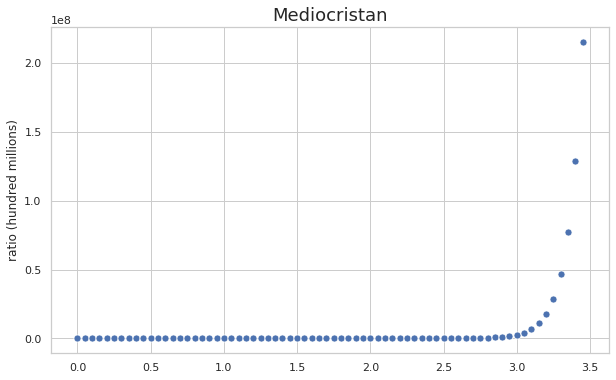

In [44]:
sns.scatterplot(x=x, y=ratio, s=50)

plt.title('Mediocristan', fontsize=18)
plt.ylabel('ratio (hundred millions)')

When you get "far out" into the tails, you can see how you are several hundred million times more likely to get two semi-rare events than really super-rare events. This allows us to safely make inferences without the data being dominated by tail events.

# Law of large numbers (LLN) under fat tails

To get some intuition for how quickly our sample mean approaches the true mean, we can do some quick simulations. We take a "high variance" normal distribution with 10,000 samples. A cumulative mean then shows how we approach the true mean of zero.

In [5]:
mu, sigma, n = 0, 20, 10000
thin = norm.rvs(mu, sigma, size=n)

Text(0.5, 1.0, 'High-variance Gaussian')

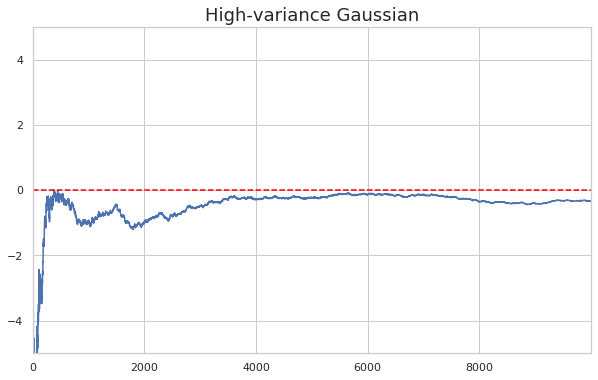

In [54]:
thin_mean = pd.Series(thin).expanding().mean()
thin_mean.plot()
plt.ylim((-5, 5))

plt.axhline(0, color="red", ls='--')
plt.title('High-variance Gaussian', fontsize=18)

Not a problem. Now compare to how this looks with tails of varying fatness.

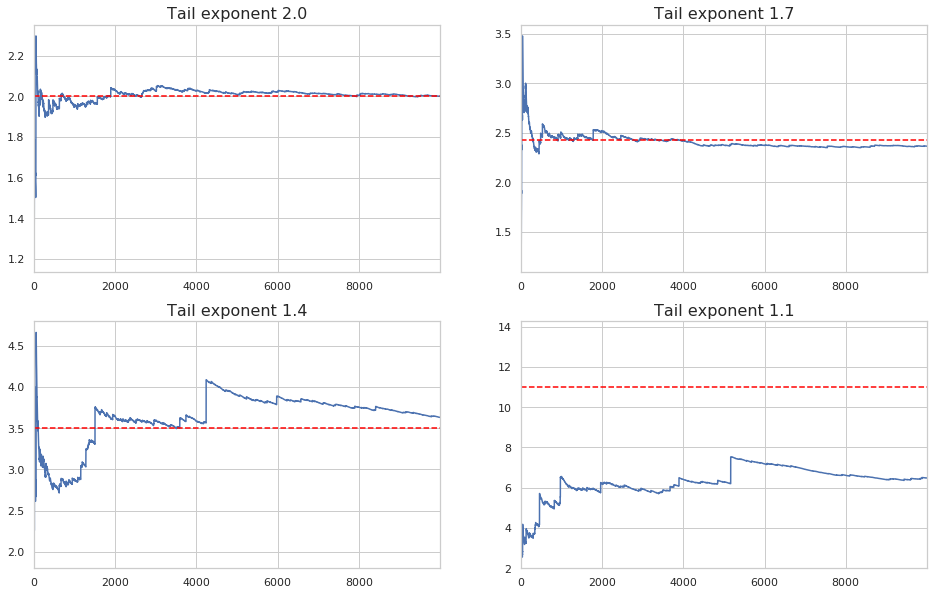

In [56]:
#tail exponent
b = 2.

plt.subplots(2, 2, figsize=(16, 10))

for x in range(1, 5):
    
    plt.subplot(2, 2, x)
    
    
    mean, var, skew, kurt = pareto.stats(b, moments='mvsk')

    fat = pareto.rvs(b, size=n)
    fat_mean = pd.Series(fat).expanding().mean().plot()

    plt.axhline(mean, color="red", ls='--')
    
    plt.title('Tail exponent ' + str(round(b, 1)), fontsize=16)
    
    b -= 0.3
    

Notice how, with a smaller tail exponent, our data stays farther and farther away from the red line. Under fat tails, we will need many more samples before we can say anything about the "true mean." Things get worse when you realize that, in practice, we do not know how fat the tails are. We may think we know the mean when we do not!

# Compression of sampling distribution

Another way to get a feel for how much more reliable sampling gets with more data, one can compare two sampling distributions to one another. We do this below (again) with a high-variance Gaussian and a Pareto with tail exponent 1.1.

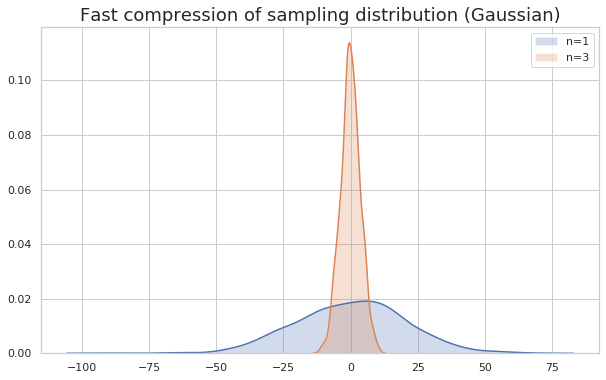

In [59]:
n1 = [np.random.normal(0, 20, 1).mean() for sample in np.arange(1000)]
n10 = [np.random.normal(0, 20, 10).mean() for sample in np.arange(1000)]

sns.kdeplot(n1, gridsize=1000, shade=True)
sns.kdeplot(n30, gridsize=1000, shade=True)

plt.title('Fast compression of sampling distribution (Gaussian)', fontsize=18)
plt.legend(['n=1', 'n=3'])

Here, we see how a moderate increase in sample size means significant compression to our sampling distribution. Now let us look at the Pareto.

In [57]:
b = 1.1

n300 = [pareto.rvs(b, size=3000).mean() for sample in np.arange(1000)]
n600 = [pareto.rvs(b, size=6000).mean() for sample in np.arange(1000)]

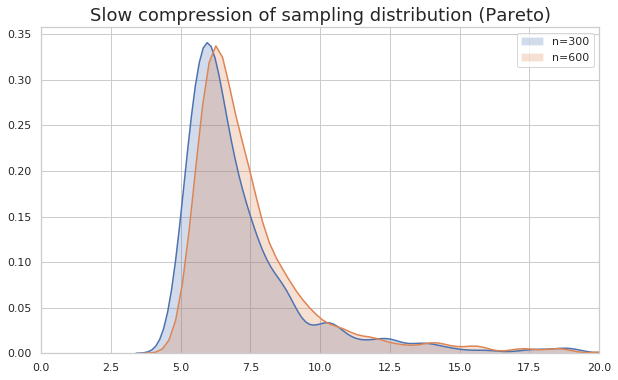

In [58]:
sns.kdeplot(n300, gridsize=1000, shade=True)
sns.kdeplot(n600, gridsize=1000, shade=True)

plt.title('Slow compression of sampling distribution (Pareto)', fontsize=18)
plt.xlim(0, 20)
plt.legend(['n=300', 'n=600'])

Here, there is not much difference between the two distributions, despite a doubling of sample size from 300 to 600. You will need a lot more data before you can say something meaningful!